In [173]:
import nbsetup
import numpy as np
import ensemblepy as ep
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
def obs_bin(pmfs):
    data = []
    for row in pmfs:
        data.append(np.concatenate([np.ones(int(h))*i for i, h in enumerate(row)]))
    return data, list(range(len(pmfs[0])+1))

obs_bin([[1,1],[1,2]])

([array([0., 1.]), array([0., 1., 1.])], [0, 1, 2])

In [227]:
data = []
for lower in ep.binint(1,50,4):
    for states in ep.binint(2,10):
        nbsetup.cp(lower, states)
        for samples in (2,10):#ep.binint(2,10,5):
            for diff in np.linspace(0.1,5,10):
                prep = np.ones([samples, states])*lower
                prep[0][0] = int(lower*(1+diff))
                d = ep.Discrete(*obs_bin(prep), weights=False)
                c = d.chi2()
                data.append({
                    'lower': lower,
                    'samples': samples,
                    'diff': diff,
                    'states': states,
                    'incoherence': d.incoherence,
                    'chi2': c[0],
                    'chi2p': c[1],
                })
data = pd.DataFrame(data)

50 10


In [228]:
inc = data.query('incoherence < 0.08').groupby(['samples', 'states', 'lower']).max()
chi5 = data.query('chi2p < 0.05').groupby(['samples', 'states', 'lower']).min()
chi1 = data.query('chi2p < 0.01').groupby(['samples', 'states', 'lower']).min()

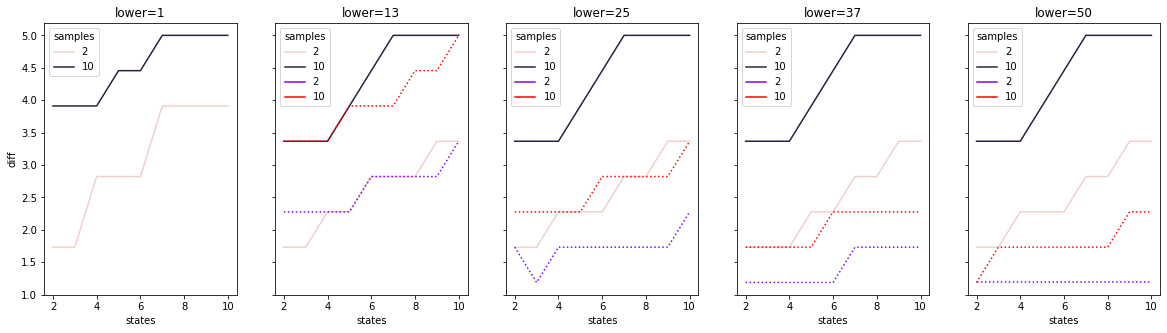

In [229]:
lowers = data.lower.unique()
fig, axes = plt.subplots(1, len(lowers), sharex=True, sharey=True, figsize=(20,5))
for i, l in enumerate(lowers):
    sns.lineplot(data=inc.query('lower==%s' % l), x='states', y='diff', hue='samples', ax=axes[i])
    g = sns.lineplot(data=chi5.query('lower==%s' % l), x='states', y='diff', hue='samples', linestyle='dotted', palette='rainbow', ax=axes[i])
    g.set(title='lower=%s' % l)

<AxesSubplot:xlabel='states', ylabel='diff'>

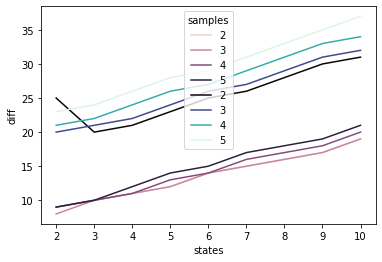

In [143]:
sns.lineplot(data=inc, x='states', y='diff', hue='samples')
sns.lineplot(data=chi, x='states', y='diff', hue='samples', palette='mako')

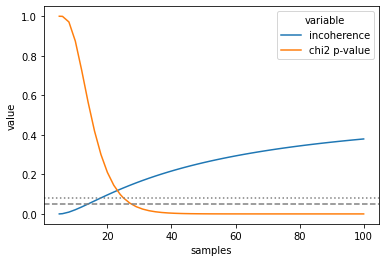

In [84]:
g = sns.lineplot(data=data.melt(id_vars='diff'), x='diff', y='value', hue='variable')
g.axhline(y=0.08, linestyle='dotted', color='grey')
g.axhline(y=0.05, linestyle='dashed', color='grey')

In [59]:
data[data.incoherence < 0.08].samples.max()

1